# CNN
- MNIST 데이터셋: digits, fashion image
- MLP
- CNN

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Epoch 1/10
329/329 [==============================] - 2s 5ms/step - loss: 0.6206 - acc: 0.8000 - val_loss: 0.2534 - val_acc: 0.9263
Epoch 2/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1999 - acc: 0.9420 - val_loss: 0.1810 - val_acc: 0.9454
Epoch 3/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1453 - acc: 0.9579 - val_loss: 0.1519 - val_acc: 0.9549
Epoch 4/10
329/329 [==============================] - 1s 4ms/step - loss: 0.1189 - acc: 0.9651 - val_loss: 0.1502 - val_acc: 0.9550
Epoch 5/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0991 - acc: 0.9707 - val_loss: 0.1318 - val_acc: 0.9598
Epoch 6/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0860 - acc: 0.9741 - val_loss: 0.1183 - val_acc: 0.9634
Epoch 7/10
329/329 [==============================] - 1s 4ms/step - loss: 0.0736 - acc: 0.9783 - val_loss: 0.1166 - val_acc: 0.9658
Epoch 8/10
329/329 [======

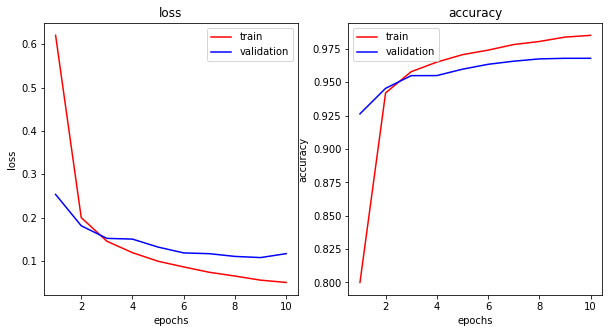

313/313 [==============================] - 0s 1ms/step - loss: 0.1129 - acc: 0.9683

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.94      0.98      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.95      0.97       892
           6       0.98      0.97      0.98       958
           7       0.94      0.98      0.96      1028
           8       0.97      0.94      0.95       974
           9       0.98      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
#--------------------------------------------------------------------------------#
#MNIST DNN Review

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.losses import mse 

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234) 

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

#min_max scaling / flattening
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(16, activation = 'relu')) #32개의 출력을 가지는 Dense층
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 학습
history = model.fit(x_train, y_train, epochs = 10,
                    batch_size = 128, validation_data = (x_val,y_val))
history.history.keys()

#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = range(1,11 ) #1~20 epoch

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(x_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(x_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

In [ ]:
#CNN
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1)

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

#MinMax Scaling
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

#Reshape for CNN
print(X_train.shape)

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#One hot encoding Y
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



(60000, 28, 28)


In [ ]:
#다른 방식
model = keras.Sequential()
model.add( layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (28, 28, 1)) )
model.add(  layers.MaxPooling2D(pool_size=(2,2)))
model.add(  layers.Conv2D(64,kernel_size=(3,3),activation='relu') )
model.add( layers.MaxPooling2D(pool_size=(2,2)) )
model.add(  layers.Flatten() )
model.add( layers.Dropout(0.5) )
model.add( layers.Dense(num_classes,activation='softmax') )


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

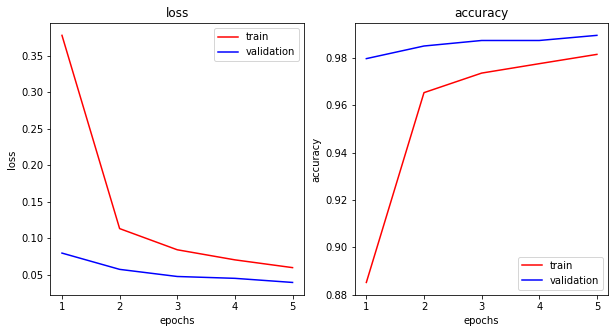

313/313 [==============================] - 3s 9ms/step - loss: 0.0354 - accuracy: 0.9888

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
#Compile + Fit
batch_size = 128
epoch =5
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)


#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']
epochs = np.arange(epoch)+1

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
results = model.predict(X_test)
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))



4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


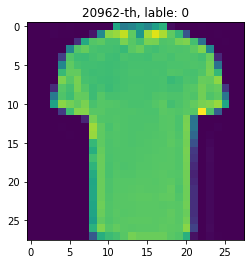

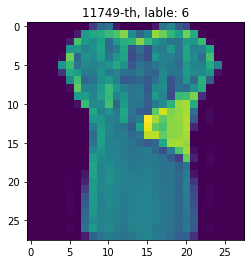

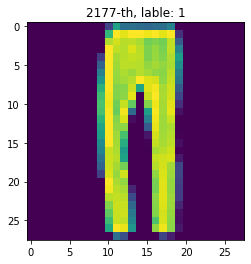

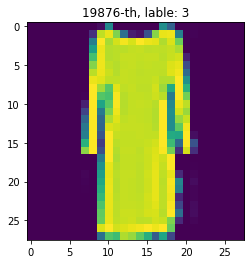

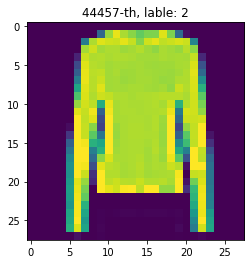

In [ ]:
#---------------------------------------------------------------------------#
#Fashion Image Dataset
from tensorflow.keras.datasets import fashion_mnist

# mnist의 패션 데이터
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(12345)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 5
# 0 ~ 59999 중 무작위 5개
random_idx = np.random.randint(60000, size=sample_size) 

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th, lable: %d' %(idx, label))

#표준화 및 reshape, 각 이미지가 28,28,1이 되도록
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

print(x_train.shape)
from tensorflow.keras.utils import to_categorical
# Y 원핫인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# validation 생성
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 12345)





In [ ]:
x_train.shape

(42000, 28, 28, 1)

In [ ]:
#모델링
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,BatchNormalization

model = Sequential( )
model.add( Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', 
                  input_shape = (28, 28, 1)) ) #가로, 세로, 채널
model.add( BatchNormalization() )	#레이어 입력의 평균, 분산 조정, 그라디언트소실 방지
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') ) #크기 감소  
model.add( Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( BatchNormalization() )
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same') ) 
model.add( Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'))
model.add( MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'))
model.add( Flatten())  # Dense를 위해 2차원 데이터로 변형
model.add(  Dense(64, activation = 'relu') )
model.add( Dense(10, activation = 'softmax'))


#list 형태 모델링(위와 동일)
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #widthXheightXChannel
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'), 
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), 
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') 
])

model.summary()

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history = model.fit(x_train, y_train, epochs = 1, validation_split=0.1)



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                      

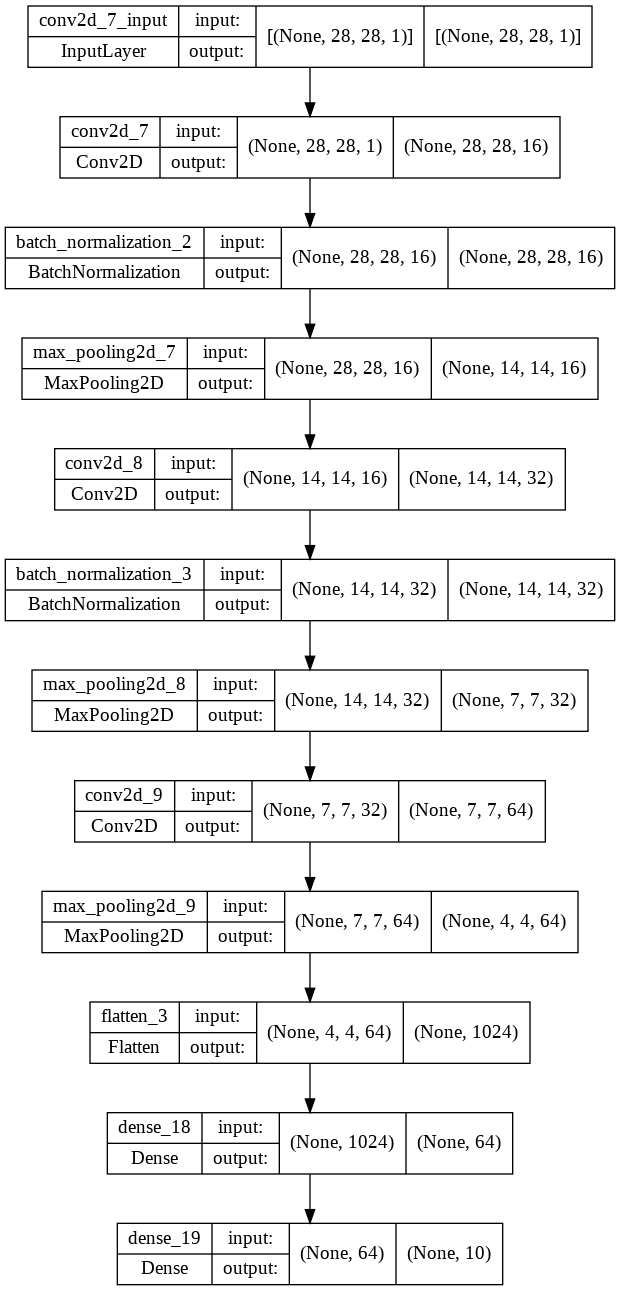

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.png', show_shapes=True)


In [ ]:
#Conv+Pool, Drop Out 추가
from tensorflow.keras.layers import Dropout
model1 = Sequential( )
model1.add( Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)) )
model1.add( BatchNormalization() )
model1.add( Conv2D(32,(3,3),padding='same', activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size = (2, 2), padding = 'same') )
model1.add( Dropout(0.25) )

model1.add( Conv2D(64,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(64,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.25))

model1.add( Conv2D(128,(3,3),padding='same',activation = 'relu') )
model1.add( BatchNormalization() )
model1.add( Conv2D(128,(3,3),padding = 'same',activation= 'relu') )
model1.add( BatchNormalization() )
model1.add( MaxPool2D(pool_size=(2,2),padding = 'same'))
model1.add( Dropout(0.5))

model1.add( Flatten() )
model1.add( Dense(256,activation='relu'))
model1.add( BatchNormalization())
model1.add( Dropout(0.5))
model1.add( Dense(10,activation='softmax'))



model1.summary()

model1.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

history1 = model1.fit(x_train, y_train, epochs = 1, validation_split=0.1)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                      

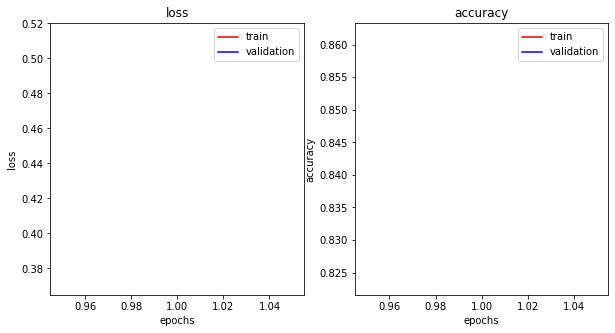

In [ ]:
#학습결과 확인
import matplotlib.pyplot as plt
his_dict = history1.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 
acc = his_dict['acc']
val_acc = his_dict['val_acc']
epochs = np.arange(1 )+1 #추후 epoch 늘려서 조정

#plot
fig = plt.figure(figsize= (10,5) )

# loss
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'red', label = 'train')
ax1.plot(epochs, val_loss, color = 'blue', label = 'validation')
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

#accuracy
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'red', label = 'train')
ax2.plot(epochs, val_acc, color = 'blue', label = 'validation')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

# Cifar-10 데이터셋으로 분류모형 생성
- MLP 생성
- 실제 사진에 적용

# 실습
1. 아래 코드를 참고하셔서, MLP를 개선해보세요!
2. tensorboard를 넣어주세요~!
3. test-car.jpg를 업로드해서 분류해보세요.
4. 구글 등에서 자동차, 배, 비행기 사진을 jpg로 다운로드하셔서 이 모형에 적용해보세요.


In [ ]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
y_train.shape

(50000, 1)

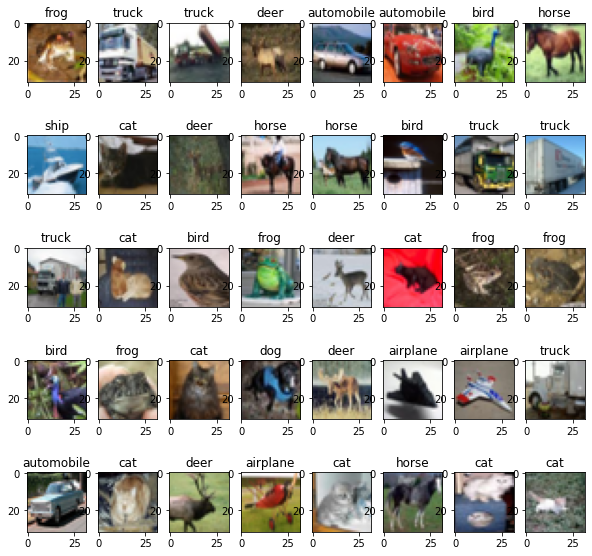

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 1차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

X_train.shape

(50000, 3072)

In [ ]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_data=(X_test, y_test))



Epoch 1/5
1563/1563 [==============================] - 30s 19ms/step - loss: 1.9350 - accuracy: 0.2873 - val_loss: 1.8406 - val_accuracy: 0.3297
Epoch 2/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.7166 - accuracy: 0.3792 - val_loss: 1.7065 - val_accuracy: 0.3804
Epoch 3/5
1563/1563 [==============================] - 29s 18ms/step - loss: 1.6309 - accuracy: 0.4154 - val_loss: 1.5678 - val_accuracy: 0.4436
Epoch 4/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5704 - accuracy: 0.4364 - val_loss: 1.5240 - val_accuracy: 0.4612
Epoch 5/5
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5252 - accuracy: 0.4530 - val_loss: 1.5161 - val_accuracy: 0.4610


In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 [==============================] - 2s 6ms/step - loss: 1.5161 - accuracy: 0.4610
정답률= 0.460999995470047 loss= 1.5160889625549316


In [ ]:
hist.history

{'accuracy': [0.28731998801231384,
  0.3792400062084198,
  0.41543999314308167,
  0.43639999628067017,
  0.4530400037765503],
 'loss': [1.9349827766418457,
  1.7166228294372559,
  1.6309183835983276,
  1.5703917741775513,
  1.5251679420471191],
 'val_accuracy': [0.3296999931335449,
  0.38040000200271606,
  0.44359999895095825,
  0.4611999988555908,
  0.460999995470047],
 'val_loss': [1.8406398296356201,
  1.7064523696899414,
  1.5677692890167236,
  1.523983359336853,
  1.5160889625549316]}

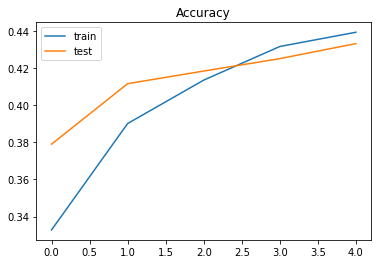

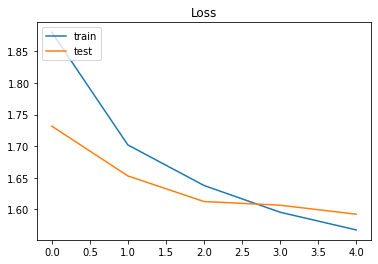

In [ ]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 모형 저장: 가중치의 저장

In [ ]:
model.save_weights('cifar10-weight.h5')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              3146752   
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 128)               65664     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 10)                650       
                                                                 
Total params: 3,746,122
Trainable params: 3,746,122
Non-trainable params: 0
_________________________________________________________________


# 실제 사진에의 적용

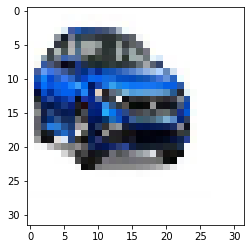

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 [==============================] - 0s 14ms/step


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 41
automobile = 42
bird = 2
cat = 1
deer = 1
dog = 0
frog = 0
horse = 0
ship = 3
truck = 5
---
예측한 결과= automobile


In [ ]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

2
3
0


# 실습 1 
- 위의 모형의 은닉층 구조를 변경하여 모형을 개선해보세요.
- epoch의 수를 늘려서 테스트해보세요
- 예제 파일인 test-car.jpg 대신, 위 데이터셋의 범주에 해당하는 다른 이미지를 넣어서 테스트해보세요.

# 동일 데이터에 대한 CNN 적용

In [ ]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

num_classes = 10
im_rows = 32
im_cols = 32
in_shape = (im_rows, im_cols, 3)

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 정규화하기 --- (*2)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
# 레이블 데이터를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=in_shape))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_data=(X_test, y_test))



Epoch 1/5
1563/1563 [==============================] - 250s 159ms/step - loss: 1.5333 - accuracy: 0.4388 - val_loss: 1.1169 - val_accuracy: 0.5980
Epoch 2/5
1563/1563 [==============================] - 246s 157ms/step - loss: 1.1240 - accuracy: 0.6009 - val_loss: 0.9557 - val_accuracy: 0.6637
Epoch 3/5
1563/1563 [==============================] - 254s 163ms/step - loss: 0.9796 - accuracy: 0.6508 - val_loss: 0.8592 - val_accuracy: 0.7013
Epoch 4/5
1563/1563 [==============================] - 252s 161ms/step - loss: 0.8917 - accuracy: 0.6856 - val_loss: 0.8159 - val_accuracy: 0.7178
Epoch 5/5
1563/1563 [==============================] - 248s 159ms/step - loss: 0.8233 - accuracy: 0.7114 - val_loss: 0.7335 - val_accuracy: 0.7482


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                      

313/313 [==============================] - 12s 37ms/step - loss: 0.7335 - accuracy: 0.7482
정답률= 0.748199999332428 loss= 0.7335468530654907


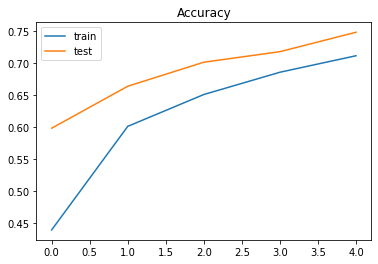

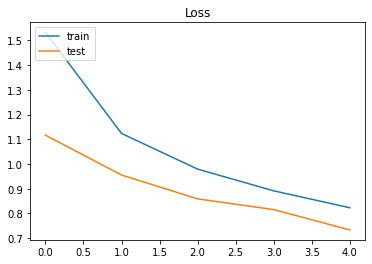

In [ ]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])

# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('cifar10-cnn-weight.h5')

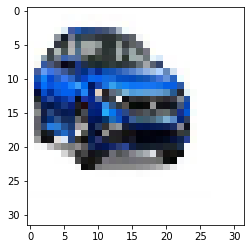

In [ ]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10-cnn-weight.h5')

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('download.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 [==============================] - 0s 206ms/step


In [ ]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 0
automobile = 98
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 0
ship = 0
truck = 1
---
예측한 결과= automobile


# 실습 2
- CNN의 은닉층 구조를 개선해보세요
- epoch를 늘려보세요
- 새롭게 얻은 모형의 가중치를 저장해보세요.